In [2]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [3]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [4]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [10]:
# 1. GOALKEEPERS

# find the best goalkeepers in the game

# get the goalkeepers from the dataset
df_position = df.groupby(df["player_positions"])
df_keeping = df_position.get_group("GK")
df_keeping = df_keeping.reset_index(drop = True)

for i in range(0, len(df_keeping['overall'])):
    if df_keeping['overall'][i] > 85:
        df_keeping = df_keeping.drop(i)

df_keeping = df_keeping.reset_index(drop=True)

# remove irrelevant columns
df_keeping = df_keeping.drop(['nationality', 'club_name', 'age', 'value_eur', 'wage_eur', 'player_positions', 'release_clause_eur', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'defending_standing_tackle', 'defending_sliding_tackle', 'mentality_penalties', 'work_rate', 'skill_dribbling', 'power_jumping', 'power_shot_power', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_composure', 'mentality_positioning', 'pace', 'shooting', 'passing', 'dribbling', 'physic', 'dribbling', 'movement_balance', 'movement_reactions', 'mentality_vision', 'movement_agility', 'movement_sprint_speed', 'movement_acceleration', 'defending'], axis = 1)

# for safekeeping keep the values in keep dataset
keep = df_keeping

# get the top 10 rated goalkeepers according to their potential
df_keeping = df_keeping[0:10]

df_keeping

,short_name,overall,potential,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,G. Donnarumma,85,92,89.0,81.0,76.0,89.0,50.0,83.0
1,B. Leno,85,87,85.0,83.0,80.0,86.0,56.0,84.0
2,P. Gulácsi,85,85,84.0,85.0,82.0,86.0,43.0,84.0
3,A. Onana,84,88,84.0,80.0,87.0,86.0,63.0,82.0
4,R. Bürki,84,85,85.0,82.0,72.0,88.0,47.0,82.0
5,K. Schmeichel,84,84,82.0,77.0,83.0,89.0,54.0,79.0
6,S. Sirigu,84,84,84.0,80.0,76.0,82.0,51.0,84.0
7,Rui Patrício,84,84,84.0,80.0,77.0,83.0,55.0,82.0
8,T. Strakosha,83,88,86.0,79.0,75.0,88.0,44.0,81.0
9,Pau López,83,88,82.0,83.0,79.0,84.0,49.0,82.0


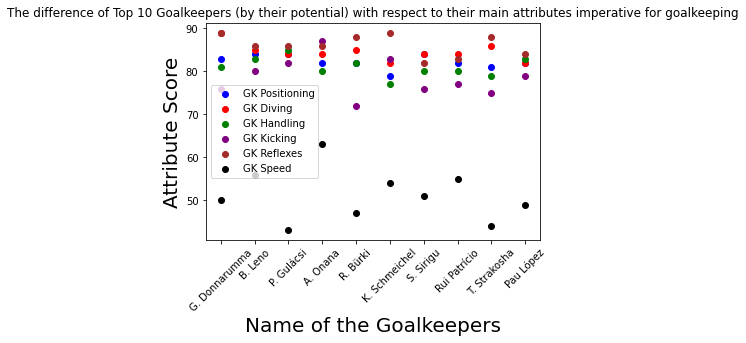

In [11]:
# plot the top 10 goalkeepers with their most associated attributes

plt.scatter(df_keeping.short_name, df_keeping.gk_positioning, color = 'blue', label = 'GK Positioning')
plt.scatter(df_keeping.short_name, df_keeping.gk_diving, color = 'red', label = 'GK Diving')
plt.scatter(df_keeping.short_name, df_keeping.gk_handling, color = 'green', label = 'GK Handling')
plt.scatter(df_keeping.short_name, df_keeping.gk_kicking, color = 'purple', label = 'GK Kicking')
plt.scatter(df_keeping.short_name, df_keeping.gk_reflexes, color = 'brown', label = 'GK Reflexes')
plt.scatter(df_keeping.short_name, df_keeping.gk_speed, color = 'black', label = 'GK Speed')
plt.xlabel('Name of the Goalkeepers', fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel('Attribute Score', fontsize = 20)
plt.title('The difference of Top 10 Goalkeepers (by their potential) with respect to their main attributes imperative for goalkeeping')
leg = plt.legend( loc = 'center left')
plt.show()


In [12]:
# get the goalkeeper names in names
names = []
names.append(df_keeping['short_name'])

# work on top 3 goalkeepers to find any similarities
ter = df_keeping.drop("short_name", axis = 1).iloc[0]
oblak = df_keeping.drop("short_name", axis = 1).iloc[1]
don = df_keeping.drop("short_name", axis = 1).iloc[2]

In [13]:
labels = []
for i in range(1, len(df_keeping) - 1):
    labels.append(df_keeping.columns[i])
#print(labels)
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

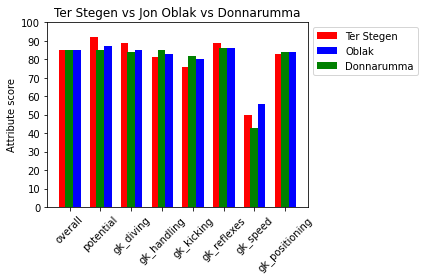

In [14]:
# plot the top 3 rated goalkeepers by their potential

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.3 + width/3, ter, width, label='Ter Stegen', color = 'red')
rects2 = ax.bar(x + 0.15 + width/3, oblak, width, label='Oblak', color = 'blue')
rects3 = ax.bar(x - 0.1 + width/3, don, width, label='Donnarumma', color = 'green')

y_major_ticks = np.arange(0, 110, 10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attribute score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y_major_ticks)
plt.title('Ter Stegen vs Jon Oblak vs Donnarumma', fontsize=12, ha='center')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()


In [42]:
# therefore the most important attributes for a goalkeeper to have
# are gk_reflexes, gk_positionig, gk_handling, gk_diving, gk_kicking
# and gk_speed in that order

In [16]:
keeping = df_keeping.drop('short_name', axis = 1)/100

keeping = keeping.drop('overall', axis = 1)
keeping = keeping.drop('potential', axis = 1)

In [17]:
# find the 'score' for each goalkeeper to say which attributes are 
# relevant and which aren't

for i in range(0, len(names)):
    score = {'name': names[i]}

score['total'] = keeping.sum(axis = 1)
keeping

,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,0.89,0.81,0.76,0.89,0.50,0.83
1,0.85,0.83,0.80,0.86,0.56,0.84
2,0.84,0.85,0.82,0.86,0.43,0.84
3,0.84,0.80,0.87,0.86,0.63,0.82
4,0.85,0.82,0.72,0.88,0.47,0.82
5,0.82,0.77,0.83,0.89,0.54,0.79
6,0.84,0.80,0.76,0.82,0.51,0.84
7,0.84,0.80,0.77,0.83,0.55,0.82
8,0.86,0.79,0.75,0.88,0.44,0.81
9,0.82,0.83,0.79,0.84,0.49,0.82


In [18]:
# Ederson and Neuer have a total of 4.98 and 4.97 out of the total 6
# from the gk attributes and their potential is 91 and 89 respectively
# which is less than Oblak, Donnarumma, and Stegen. Therefore, it is
# not necessary to have great values in all attributes. Values should
# be greater in the important attributes rather than all the irrelevant
# attributes like gk_speed

In [19]:
# this is the table according to scores from 6

df_keeping['Total'] = score['total']
df_keeping.sort_values(by=['Total'], inplace=True, ascending=False)
df_keeping = df_keeping.reset_index(drop = True)
df_keeping

,short_name,overall,potential,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,Total
0,A. Onana,84,88,84.0,80.0,87.0,86.0,63.0,82.0,4.82
1,B. Leno,85,87,85.0,83.0,80.0,86.0,56.0,84.0,4.74
2,G. Donnarumma,85,92,89.0,81.0,76.0,89.0,50.0,83.0,4.68
3,K. Schmeichel,84,84,82.0,77.0,83.0,89.0,54.0,79.0,4.64
4,P. Gulácsi,85,85,84.0,85.0,82.0,86.0,43.0,84.0,4.64
5,Rui Patrício,84,84,84.0,80.0,77.0,83.0,55.0,82.0,4.61
6,Pau López,83,88,82.0,83.0,79.0,84.0,49.0,82.0,4.59
7,S. Sirigu,84,84,84.0,80.0,76.0,82.0,51.0,84.0,4.57
8,R. Bürki,84,85,85.0,82.0,72.0,88.0,47.0,82.0,4.56
9,T. Strakosha,83,88,86.0,79.0,75.0,88.0,44.0,81.0,4.53


In [20]:
keep_names = pd.DataFrame(keep['short_name'])
keep = keep.drop('short_name', axis = 1)
keep = keep.drop('potential', axis = 1)

keep_norm = (keep - keep.mean())/keep.std()

In [22]:
# use Linear Regression to predict the overall of goalkeepers
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = keep_norm.drop('overall', axis = 1)
w = keep_norm['overall']

lm.fit(x,w)
yhat = lm.predict(x)
print(lm.intercept_)
print(lm.coef_)

-1.0108702087942775e-15
[0.23772601 0.21441298 0.05573273 0.26275506 0.02143907 0.27782813]


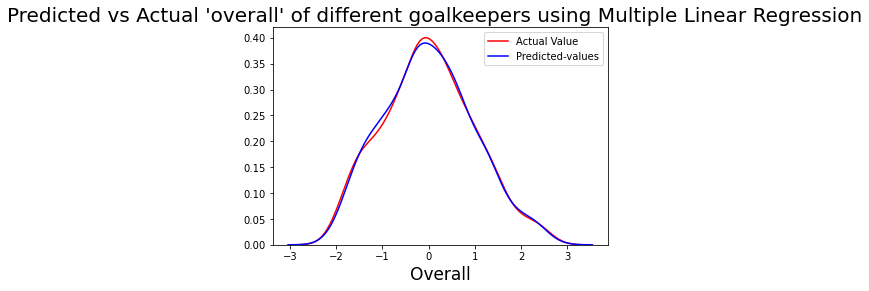

In [23]:
# plot the distribution for actual and predicted values

ax1 = sns.distplot(keep_norm['overall'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(yhat, hist = False, color = 'b', label = 'Predicted-values', ax = ax1)
plt.figtext(.5, .9, "Predicted vs Actual 'overall' of different goalkeepers using Multiple Linear Regression", fontsize = 20, ha = 'center')
plt.xlabel("Overall", fontsize = 17)
plt.show()


In [24]:
# get the actual and predicted table for goalkeepers
avp = pd.DataFrame({'Actual' : w, 'Predicted' : yhat})
df.sort_index(inplace=True)

add_names = avp.join(keep_names['short_name'])

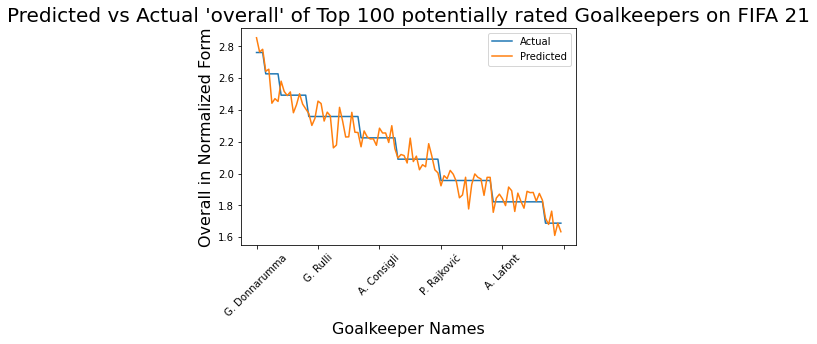

In [25]:
# plot the actual vs predicted of top 100 rated goalkeepers according
# to their potential

add_names[0:100].plot(x = 'short_name', y = ['Actual','Predicted'])
plt.title("Predicted vs Actual 'overall' of Top 100 potentially rated Goalkeepers on FIFA 21", fontsize = 20, ha = 'center')
plt.xlabel('Goalkeeper Names', fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Overall in Normalized Form', fontsize = 16)
plt.show()

In [26]:
# get the error rate for linear regression
from sklearn import metrics
from math import sqrt
print('Mean Squared Error:', sqrt(metrics.mean_squared_error(w, yhat)))
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(w, yhat)))

Mean Squared Error: 0.09932401932594757
Accuracy: 0.9006759806740524


In [27]:
# accuracy for the top 100 goalkeepers
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(w[:100], yhat[:100])))

Accuracy: 0.9299355478360958
